# Kapitel 2 - Das Korpus

## 2.1. Kapitelübersicht <a class="anchor" id="2-1"/>

Textklassifikationsverfahren klassifizieren anhand von Textdaten. Gesammelte Textdaten werden auch <b>Textkorpus</b> gennant.

<b>Abschnittsübersicht</b><br>

[2.1. Kapitelübersicht](#2-1)<br>
[2.2. Analyse eines kleinen Datensatzes](#2-2)<br>
[2.3. Aufbau des Wikipedia-Korpus](#2-3)<br>

## 2.2. Analyse eines kleinen Datensatzes <a class="anchor" id="2-2"/>

Textklassifikation kann nur anhand von Daten durchgeführt werden. Diese Daten müssen aus zwei wesentlichen Dingen(?) bestehen: Texten und Klassen. Klassen können bei einer Textklassifikation sehr unterschiedliche Dinge sein, z.B. ein Musikgenre, ein Username, eine Zusammenfassung oder eine Punktzahl. Im folgenden Beispiel schauen wir uns einen Datensatz an, dessen Textdaten Filmrezensionen und die Klassen Schulnoten von 1-6 sind.

In [1]:
import pandas as pd

d = {"r1": [1, "Der Film war so genial!"], 
     "r2": [6, "Schlechtester Film aller Zeiten!!!!1!!!1!!"],
     "r3": [3, "Er war schon okay"],
     "r4": [1, "Ich will den Film für den Rest meines Lebens jeden Tag gucken :O"],
     "r5": [2, "Richtig guter Film mit kleineren Schwächen"],
     "r6": [4, "Naja, gibt besseres, aber auch schlechteres, wenn auch nicht viel..."],
     "r7": [5, "Bis auf die Songauswahl war der Film zum Kotzen"]}
df = pd.DataFrame.from_dict(d, orient="index", columns=["Note", "Rezension"])
df

,Note,Rezension
r1,1,Der Film war so genial!
r2,6,Schlechtester Film aller Zeiten!!!!1!!!1!!
r3,3,Er war schon okay
r4,1,Ich will den Film für den Rest meines Lebens j...
r5,2,Richtig guter Film mit kleineren Schwächen
r6,4,"Naja, gibt besseres, aber auch schlechteres, w..."
r7,5,Bis auf die Songauswahl war der Film zum Kotzen


Ein guter erster Schritt, um sich mit einem Datensatz vertraut zu machen, ist eine <b>Verteilung</b> der Klassen zu visualisieren. Wir können somit erkennen, dass jede Schulnote in unserem Datensatz einmal vorkommt. Nur die Note "1" kommt zweimal vor. Keine der Schulnoten fehlt, weshalb ein Klassifizierungsverfahren bei einer Voraussage von neuen Texten jede Schulnote vergeben könnte.

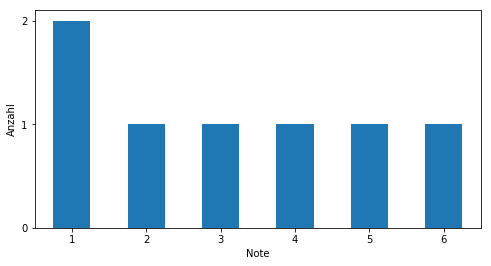

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
ax = df.groupby('Note').Rezension.count().plot.bar(rot=0)
ax.set_ylabel("Anzahl")
ax.set_yticks([0, 1, 2])
plt.show()

Dieser Datensatz ist nicht besonders groß. Eine Textklassifizierung wäre hier nicht unbedingt nötig, da dies von Menschen schneller erledigt werden kann. Bei größeren Datensätzen ist eine menschliche Textklassifikation entweder sehr aufwändig oder nicht möglich.

## 2.3. Aufbau des Wikipedia-Korpus <a class="anchor" id="2-3"/>

Im Gegensatz zu englischsprachigen Datensätzen sind deutschsprachige Datensätze nicht so weit verbreitet. Das Unternehmen Lionbridge hat eine Listen von deutschen <a href="https://lionbridge.ai/datasets/20-best-german-language-datasets-for-machine-learning/">Datensätzen</a> erstellt. Wir werden in diesem Tutorial ein von mir selbst erstelltes Korpus verwenden. Es ist eine verbesserte Version des Korpus, der im Zuge des "Word Embeddings"-Seminars an der Julius-Maximilians-Universität im Wintersemester 2018/19 entstanden ist. Dieses Korpus besteht aus Wikipediartikeln, deren Klassen Kategorien von Wikipedia sind. Das selbsterstelle Tool "wikiparser.py" befindet sich ebenfalls im Github-Projet <a href="https://github.com/papajan3000/german_text_classification_nlp">german_text_classification_nlp</a>. Eine Erläuterung, wie dieses Korpus erstellt wurde und wie die Daten nachbearbeitet wurden, befindet sich im Bonuskapitel ??? (TODO). In diesem Kapitel soll zunächst nur ein Einblick in das Korpus gegeben werden.

In [62]:
corpus = pd.read_csv("tutorialdata/corpora/wikicorpus_v2.csv", index_col=0)
corpus.head()

,id,category,length,text
0,3470,Album nach Typ,1050,All the Best ! ( englisch Alles Gute ! ) ist d...
1,3611,Album nach Typ,525,Let It Roll : Songs by George Harrison ist das...
2,3612,Album nach Typ,251,Lieder wie Orkane ist das dritte offizielle Be...
3,3613,Album nach Typ,756,Long Stick Goes Boom : The Anthology ist eine ...
4,3614,Album nach Typ,260,Los Grandes Éxitos en Español ( spanisch für D...


Jede Zeile unseres Korpus repräsentiert einen Artikel von Wikipedia. Jeder Artikel hat 4 Eigenschaften, repräsentiert durch die Spalten: Eine ID (<b>"id"</b>), eine Kategorie (<b>"category"</b>, eine Länge (<b>"length"</b>) und der Artikel selber (<b>"text"</b>").<br>
Wie bereits beim Filmrezensionen-Datensatz schauen wir uns zuerst die <b>Verteilung der Klassen</b> an.

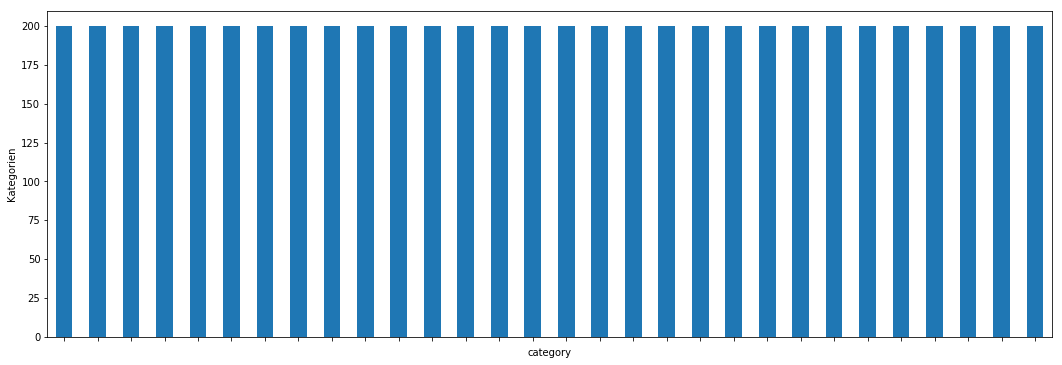

In [64]:
plt.figure(figsize=(18,6))
ax = corpus.groupby('category').text.count().plot.bar(rot=0)
ax.set_ylabel("Anzahl der Artikel")
ax.set_ylabel("Kategorien")
ax.set_xticklabels([])
plt.show()

Die zweite Version des Korpus, die wir hier sehen, wurde so bearbeitet, dass sie für jede Kategorie die gleiche Anzahl an Artikeln (genau 200) enthält. Die erste Version des Korpus sieht da noch anders aus:

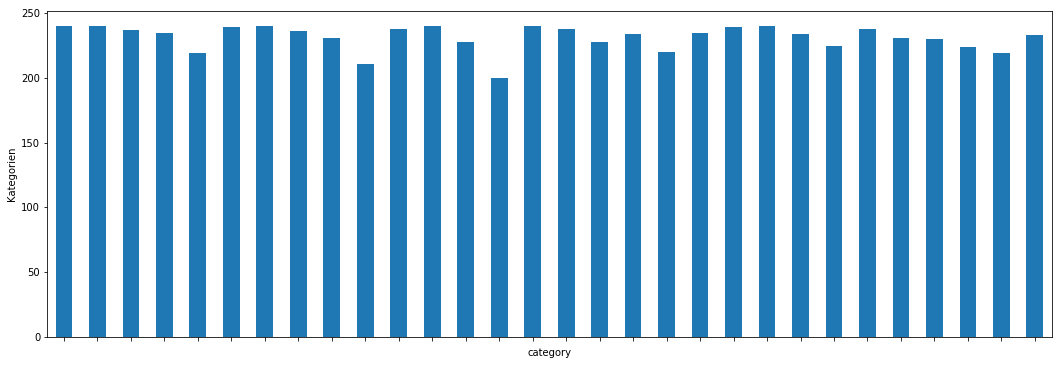

In [66]:
old_corpus = pd.read_csv("tutorialdata/corpora/wikicorpus.csv", index_col=0)
plt.figure(figsize=(18,6))
ax2 = old_corpus.groupby('category').text.count().plot.bar(rot=0)
ax2.set_ylabel("Anzahl der Artikel")
ax2.set_ylabel("Kategorien")
ax2.set_xticklabels([])
plt.show()

Durch die Anpassung des ursprünglichen Korpus ist die Anzahl der Artikel insgesamt verringert worden.

In [68]:
print(corpus.shape)
print(old_corpus.shape)

(6000, 4)
(6942, 3)


Warum Daten aufbereiten so wichtig ist bzw. was die meisten Data Scientist machen: https://www.forbes.com/sites/gilpress/2016/03/23/data-preparation-most-time-consuming-least-enjoyable-data-science-task-survey-says/#7c81cd56f637

kein imbalanced dataset (kapitel 5)